<a href="https://colab.research.google.com/github/Lizidze/project_template/blob/master/python_practice_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [ ]:
# cell for imports. All imports must go here.


1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [7]:
import pandas as pd
df = pd.read_csv('train.csv')

print("Загальна інформація:")
print(df.info())

print("\n Перші 5 записів:")
print(df.head())


Загальна інформація:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

 Перші 5 записів:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5     

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

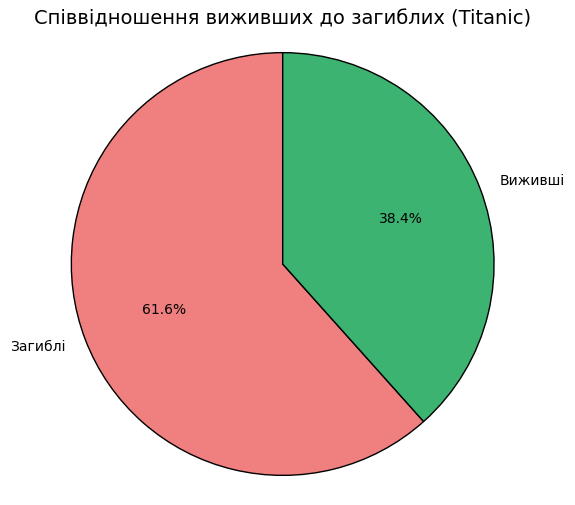

In [3]:
import matplotlib.pyplot as plt

survival_counts = df['Survived'].value_counts()

labels = ['Загиблі', 'Виживші']

colors = ['lightcoral', 'mediumseagreen']

plt.figure(figsize=(6,6))
plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Співвідношення виживших до загиблих (Titanic)', fontsize=14)
plt.axis('equal')
plt.show()

На графіку показано співвідношення пасажирів, які вижили (Survived = 1), до тих, хто загинув (Survived = 0). Згідно з графіком, приблизно 38% пасажирів вижили, тоді як 62% загинули

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


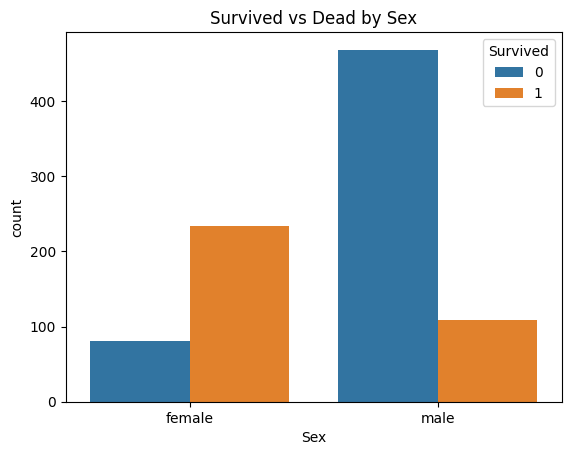

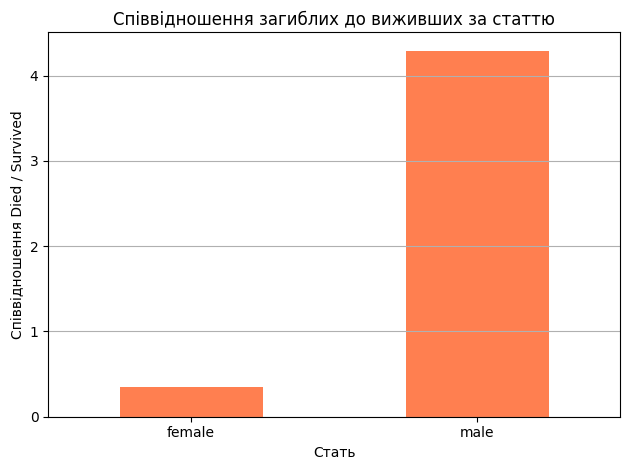

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = df.groupby(['Sex', 'Survived'], as_index=False).size()

pivot = grouped.pivot(index='Sex', columns='Survived', values='size')

pivot.columns = ['Died', 'Survived']

pivot['Ratio'] = pivot['Died'] / pivot['Survived']

pivot['Ratio'].plot(kind='bar', color='coral')
plt.title('Співвідношення загиблих до виживших за статтю')
plt.ylabel('Співвідношення Died / Survived')
plt.xlabel('Стать')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

З графіка видно, що чоловіки мали значно вище співвідношення загиблих до виживших, тобто більшість загинула.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

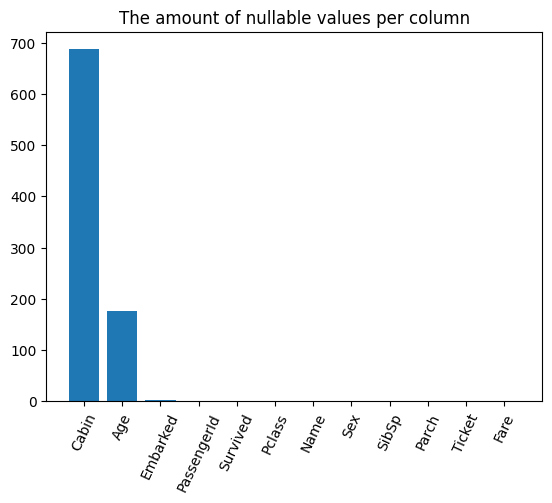

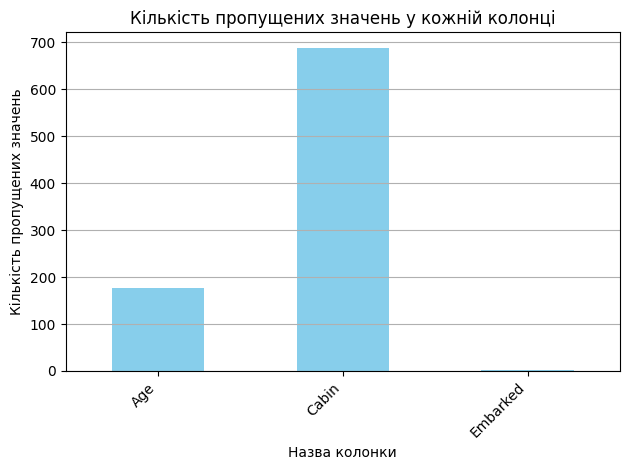

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_values.plot(kind='bar', color='skyblue')
plt.title('Кількість пропущених значень у кожній колонці')
plt.xlabel('Назва колонки')
plt.ylabel('Кількість пропущених значень')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Найбільше пропущених значень міститься у колонці Cabin, також є відсутні значення у Age та Embarked

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

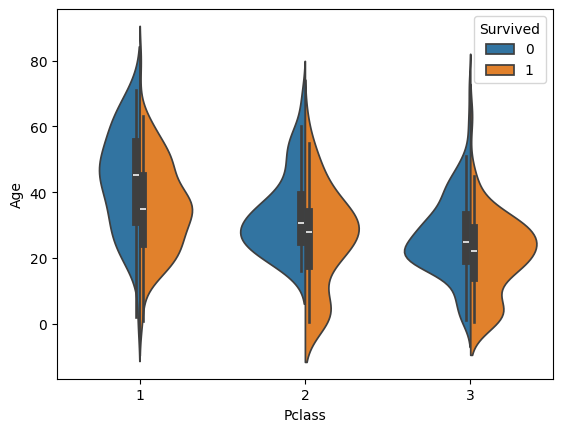

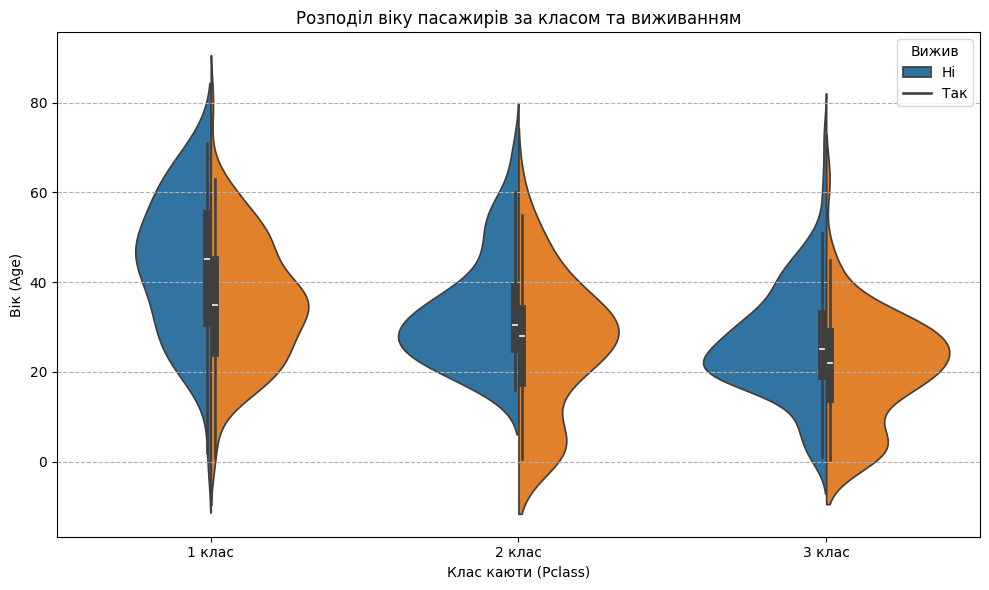

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

titanic = pd.read_csv('train.csv')

plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic, split=True)

plt.title('Розподіл віку пасажирів за класом та виживанням')
plt.xlabel('Клас каюти (Pclass)')
plt.ylabel('Вік (Age)')

plt.legend(title='Вижив', loc='upper right', labels=['Ні', 'Так'])

plt.xticks(ticks=[0, 1, 2], labels=['1 клас', '2 клас', '3 клас'])

plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

На графіку зображено розподіл віку пасажирів Титаніка залежно від класу каюти (Pclass) та статусу виживання (Survived). У пасажирів першого класу переважав середній і старший вік і серед них було більше тих, хто вижив. У другому класі віковий розподіл виживаність була помірною. У третьому класі більшість пасажирів були молодими, в цій групі спостерігається найбільша кількість загиблих. Це свідчить про те, що соціальний статус (клас каюти) значно впливав на шанси пасажира вижити

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


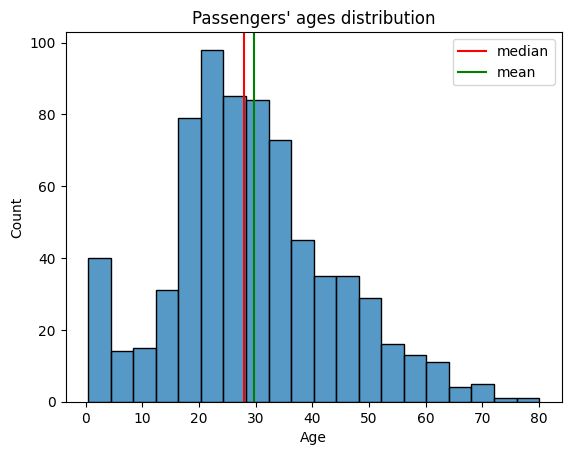

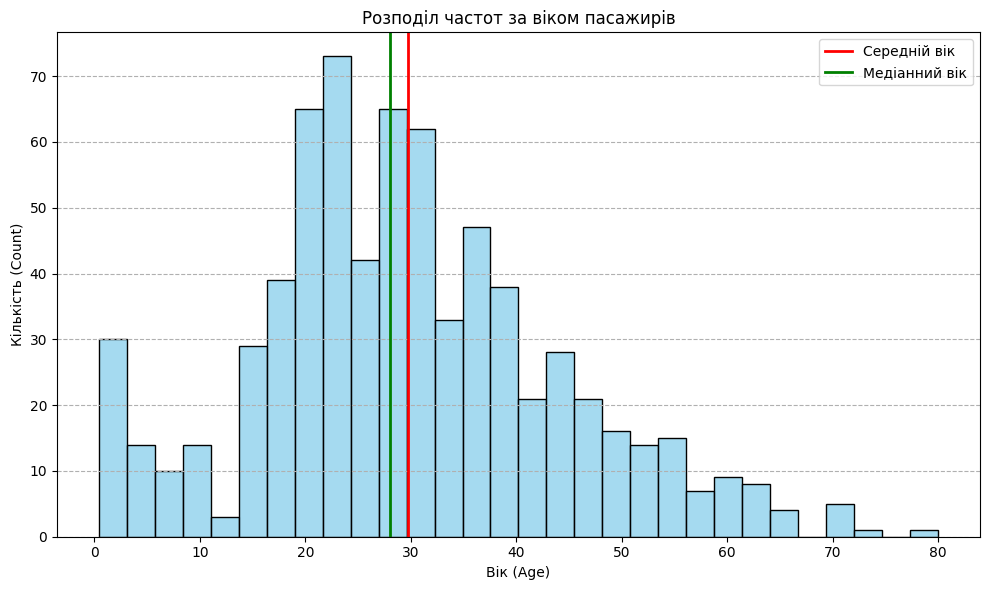

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'], bins=30, kde=False, color='skyblue', edgecolor='black')
plt.title("Розподіл частот за віком пасажирів")
plt.xlabel("Вік (Age)")
plt.ylabel("Кількість (Count)")

mean_age = titanic['Age'].mean()
median_age = titanic['Age'].median()

plt.axvline(mean_age, color='red', linestyle='-', linewidth=2, label=f'Середній вік')
plt.axvline(median_age, color='green', linestyle='-', linewidth=2, label=f'Медіанний вік')

plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

На графіку зображено гістограму розподілу віку пасажирів Титаніка. Найбільше пасажирів було у віці від 20 до 40 років, про що свідчать найвищі стовпчики. Також на графіку позначено середній (червоною лінією) та медіанний (зеленою лінією) вік. Середній вік трохи більший за медіанний, що вказує на асиметричний розподіл віку — тобто в наборі є декілька пасажирів літнього віку, які зміщують середнє значення. Це дозволяє припустити, що серед пасажирів переважали молоді й люди середнього віку, хоча були присутні й літні особи

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

1. Чи залежить виживаність пасажирів від їх статі?
2. Яка роль сімейного стану (SibSp, Parch) у виживаності?
3. Яка комбінація класу і статі давала найбільші шанси на виживання?
4. Чи є зв'язок між віком і шансом вижити?

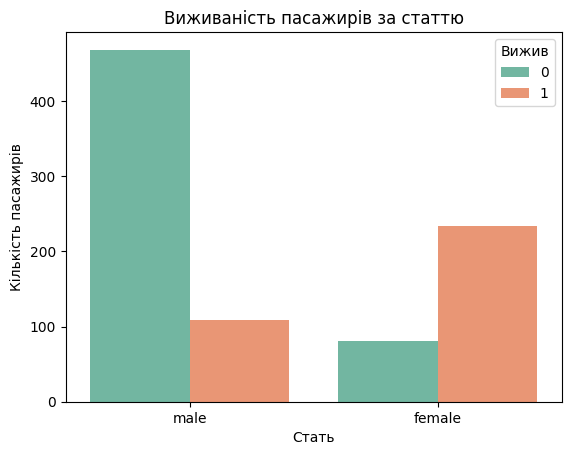

In [12]:
sns.countplot(x='Sex', hue='Survived', data=titanic, palette='Set2')
plt.title('Виживаність пасажирів за статтю')
plt.xlabel('Стать')
plt.ylabel('Кількість пасажирів')
plt.legend(title='Вижив')
plt.show()

Text(0.5, 1.0, 'Виживаність залежно від кількості братів/сестер або подружжя')

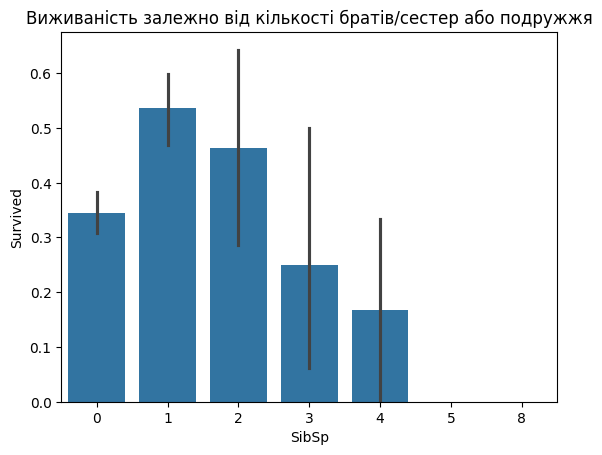

In [13]:
sns.barplot(x='SibSp', y='Survived', data=titanic)
plt.title('Виживаність залежно від кількості братів/сестер або подружжя')

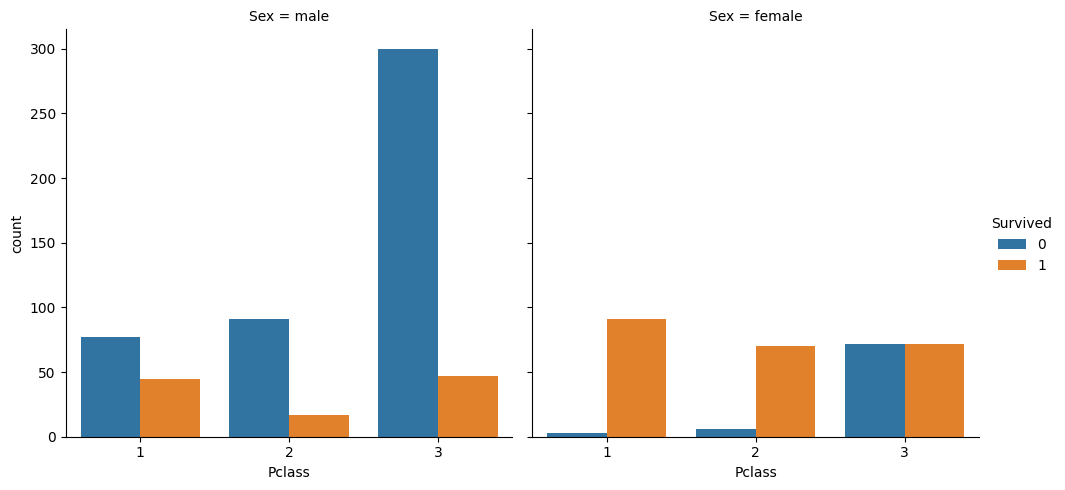

In [15]:
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=titanic)

Text(0.5, 1.0, 'Розподіл віку серед загиблих і виживших')

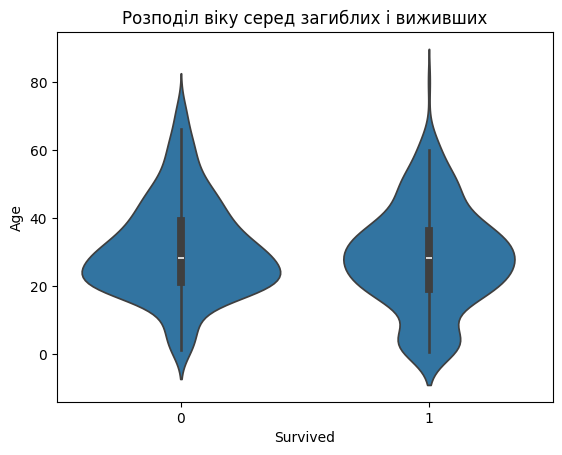

In [16]:
sns.violinplot(x='Survived', y='Age', data=titanic)
plt.title('Розподіл віку серед загиблих і виживших')

1.Жінки мали значно вищу ймовірність вижити, ніж чоловіки. Це вказує на пріоритет у рятуванні жінок.
2. Люди, які подорожували з 1–2 родичами, мали вищі шанси вижити, ніж ті, хто був наодинці або з великою родиною.
3. Жінки 1-го класу майже всі вижили, тоді як чоловіки 3-го класу — найбільше загиблих.
4. Молодші пасажири мали більшу виживаність



# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

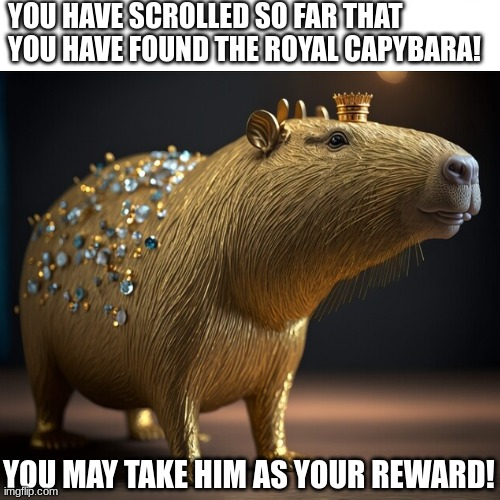